In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# The Principle of Maximum Entropy for Discrete Random Variables

## The Brandeis dice problem
This problem is from the 1962 Brandeis lectures of E. T. Jaynes.

> When a die is tossed, the number of spots up can have any value $x$ in $1,\dots,6$. Suppose a die has been tossed $N$ times, and we are told only that the average number of spots up was not $3.5$ (as we might expect from an "honest" die) but 4.5. Given this information, <u>and nothing else</u>, what probability should we assign to $x$ spots on the next toss?

Let $X$ be a random variable corresponding to the result of tossing the die.
The description above imposes the following mean value constraint on the random variable $X$:

$$
\sum_{x=1}^6 x p(x) = 4.5.
$$

We want to develop a probability mass function for $X$ by maximizing the entropy subject to the constraints above.
We saw that this constrained optimization problem has a unique solution of the form:

$$
p(x) = \frac{\exp\{\lambda x\}}{Z(\lambda)},
$$

where $Z(\lambda)$ is the *partition function*:

$$
Z(\lambda) = \sum_{i}e^{\lambda i} = e^{\lambda} + e^{2\lambda} + \dots + e^{6\lambda},
$$

and $\lambda$ is a parameter to be tuned to satisfy the constraint.
We will identify $\lambda$ by solving a root-finding problem.
To this end, let us write the partition function as:

$$
Z(\lambda) = \left(e^{\lambda}\right)^1+\left(e^{\lambda}\right)^2 + \dots + \left(e^{\lambda}\right)^6.
$$

According to the theory, to find $\lambda$ we must solve:

$$
\frac{\partial \log Z}{\partial \lambda} = 4.5.
$$

Or equivalently:

$$
\frac{1}{Z(\lambda)}\sum_{i=1}^6 i e^{-\lambda i} = 4.5.
$$

So, to find $\lambda$, we need to find the root of this function:

$$
f(\lambda) = \frac{1}{Z(\lambda)}\sum_{i=1}^6 i e^{-\lambda i} - 4.5.
$$

Let's code it up:

In [3]:
def f(lam : float):
    """The function of which the root we want to find."""
    p_unormalized = np.exp(np.arange(1, 7) * lam)
    p = p_unormalized / np.sum(p_unormalized)
    E_X = np.sum(np.arange(1, 7) * p)
    return E_X - 4.5

To find the root, we will use the [Brent's method](https://en.wikipedia.org/wiki/Brent%27s_method) as implemented in `scipy`:

In [4]:
import scipy.optimize

# Left bound for x
a = -2
# Right bound for x
b = 2
res = scipy.optimize.root_scalar(
    f,
    bracket=(a,b),
    method='brentq',
    xtol=1e-20,
    rtol=1e-15
)

print(res)

lam = res.root

print(f'Lambda = {lam:.2f}')

# The maximum entropy probabilities
p = np.exp(lam * np.arange(1, 7))
p = p / np.sum(p)

print(f'p = {p}')

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 0.3710489380810334
Lambda = 0.37
p = [0.05435317 0.07877155 0.11415998 0.1654468  0.23977444 0.34749407]


Check that the expectation turns out to be correct:

In [5]:
(p * np.arange(1, 7)).sum()

4.5

We are good!

Now, let's plot the maximum entropy probabilities:

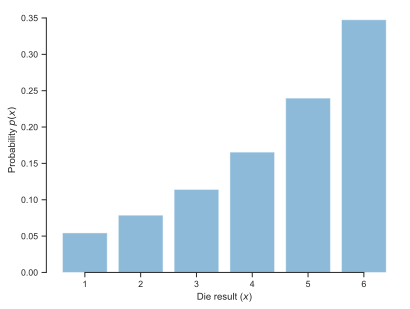

In [6]:
fig, ax = plt.subplots()
plt.bar(np.arange(1, 7), p, alpha=0.5)
ax.set_xlabel('Die result ($x$)')
ax.set_ylabel('Probability $p(x)$')
sns.despine(trim=True);

## Questions

+ Rerun the code above, assuming that the mean is 3.5. What kind of distribution do you find? Why?
+ If you have some time to spare, modify the example above to add the constraint that the variance of $X$ should be 0.2. Hint: First, translate the constraint about the variance to a constraint about $\mathbb{E}[X^2]$. Second, you need to introduce one more parameter to optimize for. Call it $\mu$. The distribution would be $p(x) = \frac{\exp\{\lambda x + \mu x^2\}}{Z(\lambda,\mu)}$. Then derive the set of non-linear equations you need to solve to find $\lambda$ and $\mu$ by expanding these two equations:

$$
\frac{\partial Z}{\partial \lambda} = \mathbb{E}[X],
$$

and

$$
\frac{\partial Z}{\partial \mu} = \mathbb{E}[X^2].
$$

Finally, use [scipy.optimize.root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root) to solve the root-finding problem.
Be careful with this because it could take several hours to do right.